### XGBoost 적용 - 위스콘신 유방암 예측

In [2]:
import xgboost as xgb 
from xgboost import plot_importance
import pandas as pd
import numpy as np 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [5]:
X_features = cancer_df.iloc[:,:-1]
X_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y_label = cancer_df.iloc[:,-1]
y_label

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

X_train.shape, X_test.shape, X_tr.shape, X_val.shape

((455, 30), (114, 30), (409, 30), (46, 30))

In [8]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [9]:
params = {'max_depth' : 3,
          'eta' : 0.05,
          'objective' : 'binary:logistic',
          'eval_metric' : 'logloss'}
num_rounds = 400
eval_list = [(dval, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, 
                      early_stopping_rounds=50, evals=eval_list)

[0]	eval-logloss:0.66183
[1]	eval-logloss:0.63609
[2]	eval-logloss:0.61144
[3]	eval-logloss:0.59204
[4]	eval-logloss:0.57329
[5]	eval-logloss:0.55037
[6]	eval-logloss:0.52930
[7]	eval-logloss:0.51534
[8]	eval-logloss:0.49718
[9]	eval-logloss:0.48154
[10]	eval-logloss:0.46990
[11]	eval-logloss:0.45474
[12]	eval-logloss:0.44229
[13]	eval-logloss:0.42961
[14]	eval-logloss:0.42065
[15]	eval-logloss:0.40958
[16]	eval-logloss:0.39887
[17]	eval-logloss:0.39050
[18]	eval-logloss:0.38254
[19]	eval-logloss:0.37393
[20]	eval-logloss:0.36789
[21]	eval-logloss:0.36017
[22]	eval-logloss:0.35421
[23]	eval-logloss:0.34683
[24]	eval-logloss:0.34111
[25]	eval-logloss:0.33634
[26]	eval-logloss:0.33082
[27]	eval-logloss:0.32675
[28]	eval-logloss:0.32099
[29]	eval-logloss:0.31671
[30]	eval-logloss:0.31277
[31]	eval-logloss:0.30882
[32]	eval-logloss:0.30437
[33]	eval-logloss:0.30103
[34]	eval-logloss:0.29794
[35]	eval-logloss:0.29499
[36]	eval-logloss:0.29295
[37]	eval-logloss:0.29043
[38]	eval-logloss:0.28

In [11]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))
preds = [ 1 if x>0.5 else 0 for x in pred_probs]
preds[:10]

[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]


[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(accuracy, precision, recall)

In [15]:
get_clf_eval(y_test, preds)

0.956140350877193 0.9615384615384616 0.974025974025974


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

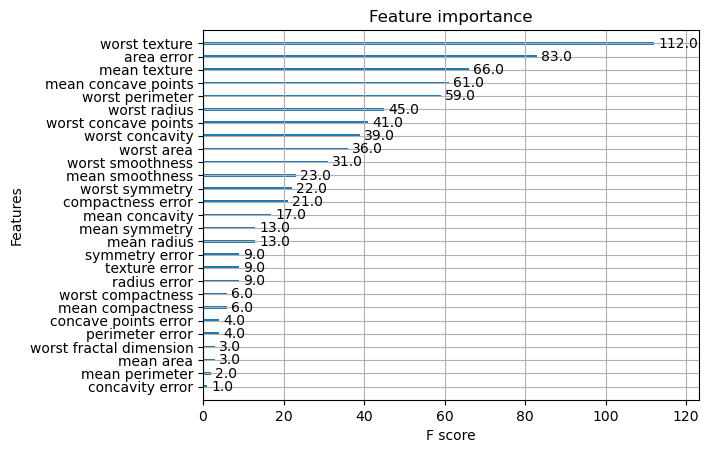

In [18]:
plot_importance(xgb_model)

#### 사이킷런 래퍼 XGBoost

In [19]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [20]:
get_clf_eval(y_test, w_preds)

0.9649122807017544 0.9620253164556962 0.987012987012987


: 